### State schema with dataClass 

- when we define a langGraph stateGraph , we use a state schema.

- The state schema represents the structure and types of data that our graph will use.

- all nodes are expected to communicate with that schema.

- langGraph offers flexibility in how you define your state schema, accommodation various python types and validation approaches ! 

In [1]:
from typing_extensions import TypedDict 
from typing import Literal  

In [ ]:
class TypeDictState(TypedDict):
    name:str
    game:Literal['cricket','badminton']
    

In [24]:
# this are 3 nodes

def play_game(state:TypeDictState):
    print("---Play Game  node has been called--")
    return {"name":state['name']+" want to play "}

def cricket(state:TypeDictState):
    print("--- Cricket node has been called ---")
    return {"name":state['name']+ " cricket.","game":"cricket"}

def badminton(state:TypeDictState):
    print("--- badminton node has been called ---")
    return {"name":state['name']+ " badminton.","game":"badminton"}


In [25]:
import random
def decide_play(state:TypeDictState)-> Literal['cricket','badminton']:
    if random.random() <0.5:
        return "cricket"
    else :
        return "badminton"


In [26]:
from langgraph.graph import StateGraph , START ,END
import random



In [27]:
graph=StateGraph(TypeDictState)

graph.add_node("PlayGame",play_game) # (<node name >, <node function>)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START,"PlayGame")
graph.add_conditional_edges("PlayGame",decide_play)
graph.add_edge('cricket',END)
graph.add_edge('badminton',END)

In [28]:
graph_png=graph.compile()

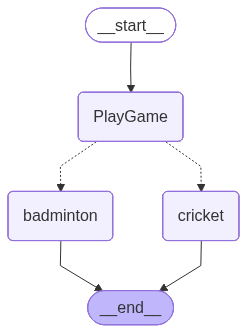

In [29]:
from IPython.display import Image, display
display(Image(graph_png.get_graph().draw_mermaid_png()))

In [ ]:
for i in range(10):
    print(f"{i} ---> {graph_png.invoke({"name":"i am Abhijit ","game":"cricket"})}\n")

---Play Game  node has been called--
--- Cricket node has been called ---
0 ---> {'name': 'i am Abhijit  want to play  cricket.', 'game': 'cricket'}

---Play Game  node has been called--
--- badminton node has been called ---
1 ---> {'name': 'i am Abhijit  want to play  badminton.', 'game': 'badminton'}

---Play Game  node has been called--
--- Cricket node has been called ---
2 ---> {'name': 'i am Abhijit  want to play  cricket.', 'game': 'cricket'}

---Play Game  node has been called--
--- badminton node has been called ---
3 ---> {'name': 'i am Abhijit  want to play  badminton.', 'game': 'badminton'}

---Play Game  node has been called--
--- Cricket node has been called ---
4 ---> {'name': 'i am Abhijit  want to play  cricket.', 'game': 'cricket'}

---Play Game  node has been called--
--- Cricket node has been called ---
5 ---> {'name': 'i am Abhijit  want to play  cricket.', 'game': 'cricket'}

---Play Game  node has been called--
--- badminton node has been called ---
6 ---> {'nam

### TypedDict

- we can use the TypedDict class from python's typing module.
- it allows you to specify keys and their corresponding value types.
- but , note that these are type hints.
- they can be used by static type checkers ( like mypy ) or IDEs to catch potential type-related errors before the code is run
- But they are not enforced at runtime!

In [ ]:
### pydantic (python data validation library)

### Dataclasses 

Python's dataclasses provide another way to define structured data.

Dataclasses offer a concise syntax for creating classes that are primarily used to store data.

In [39]:
### DataClasses

from dataclasses import dataclass

@dataclass
class DataclassState:
    name:str
    game:Literal["cricket","badminton"]

In [40]:
# this are 3 nodes

def play_game(state:DataclassState):
    print("---Play Game  node has been called--")
    return {"name":state.name+" want to play "}

def cricket(state:DataclassState):
    print("--- Cricket node has been called ---")
    return {"name":state.name+ " cricket.","game":"cricket"}

def badminton(state:DataclassState):
    print("--- badminton node has been called ---")
    return {"name":state.name+ " badminton.","game":"badminton"}


In [41]:
def decide_play(state:DataclassState)-> Literal['cricket','badminton']:
    if random.random() <0.5:
        return "cricket"
    else :
        return "badminton"

In [42]:
graph=StateGraph(DataclassState)

graph.add_node("PlayGame",play_game) # (<node name >, <node function>)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START,"PlayGame")
graph.add_conditional_edges("PlayGame",decide_play)
graph.add_edge('cricket',END)
graph.add_edge('badminton',END)

In [43]:
graph_png=graph.compile()

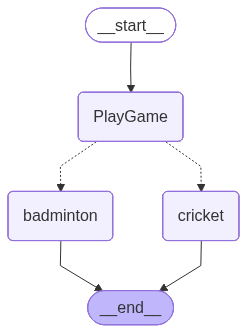

In [44]:
from IPython.display import Image, display
display(Image(graph_png.get_graph().draw_mermaid_png()))

In [47]:
graph_png.invoke(DataclassState(name="abhijit",game="cricket"))

---Play Game  node has been called--
--- badminton node has been called ---


{'name': 'abhijit want to play  badminton.', 'game': 'badminton'}

In [50]:
graph_png.invoke(DataclassState(name="123",game="cricket"))

---Play Game  node has been called--
--- Cricket node has been called ---


{'name': '123 want to play  cricket.', 'game': 'cricket'}